<div style="background: black; padding: 10px 250px"><img src="https://www.veldikompetens.se/wp-content/themes/consid/static/icons/VeldiKompetens_Logo_Web_Negative.svg" title="Veldi kompetens" /></div>

<hr><h1><center>Exercise 2c - Understanding Images</center></h1>

<h3>Instructions </h3>

<p>In this exercise the course participants should learn more about how they can manipulate images with numpy. Operations like zooming, changing pixel values and sharpening. Great examples can be found here: https://scipy-lectures.org/advanced/image_processing/ </p>

<h3> 1. Setup </h3>

<ul>
    <li>Access to the libraries used in Exercise 2b via Anaconda (Matplotlib and cv2)</li>
    <li>Access to the image on the url linked below</li>
</ul>

In [1]:
# For the assignment and this exercise we will use the url approach to ease correcting of assignments
IMG_URL = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg" 

<h3> 2. Understanding Images</h3>

<h4> 2.1: Importing Libraries </h4>
<p>Run the code cell below to import the neccesary libraries</p>

In [3]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen, Request

<p>Note: the %matplotlib inline is a magical function which we recommend reading up on. In short it allows you to render plots and figures inside of the notebook instead of opening a seperate window for it.</p>

<h4> 2.2: Accessing an img in a remote directory </h4>
For an explanation, check out exercise 2b

In [4]:
def img_via_url():
    # Returns a Numpy Array with RGB colors
    URL = IMG_URL
    HEADER = {'User-Agent': 'Mozilla/5.0'}
    with urlopen(URL) as req:
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        BGR_img = cv2.imdecode(arr, -1) 
        
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
        
    return RGB_img


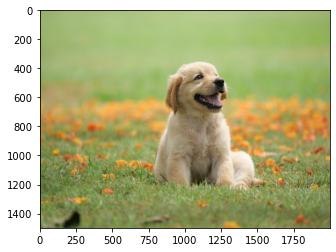

In [5]:
img = img_via_url()
plt.imshow(img)

<h4> 2.3 Working with images </h4>
<p>Now we will get down to the nitty and gritty of image handling in Python. In short, when using libraries such as PIL or cv2 for handling images these libraries by default utilize numpy as the backend for handling of images. Truth be told, it is hard to find a data science library that does NOT use numpy. We will in this section break down working with images and doing simple things like manipulation, working with pixels and dimensions. Lets start with some informational coding to better understand our data</p>

In [6]:
print(f"Shape of the img: {img.shape}")
print(f"Number of dimensions: {img.ndim}")
print(f"Img data type: {img.dtype}")
print(f"Img type: {type(img)}")

# Note: Retrieving sizes of an img works like matlab! .shape gives you (height, width, RGB-values)

Shape of the img: (1499, 1999, 3)
Number of dimensions: 3
Img data type: uint8
Img type: <class 'numpy.ndarray'>


<p>We can see that we have an image with 3D that is a numpy array with the data type uint8 (hopefully you now know what uint8 stands for). Worth noting here is that it might feel wierd that the array is of three dimensions although the picture is 2D. This is because numpy stores the first two values as height and width and the third dimension RGB color scheme. Lets deep dive into that and learn how to access pixel values. </p>

In [7]:
height = img.shape[0]
width = img.shape[1]


# We can think of width and height as rows and columns! This might help in understanding the following
# Basicly by saying img[0] we refer to the first row. if we want the first pixel in the row we say img[0][0] 
# which means first row first column

# Print all the pixels in the first row
print(f"First row of pixels: {img[0]} \n")

# Print the first pixel in the image
print(f"First pixel: {img[0][0]}")

First row of pixels: [[151 172 107]
 [151 172 107]
 [151 172 107]
 ...
 [157 175 113]
 [157 175 113]
 [157 175 113]] 

First pixel: [151 172 107]


<p>How my output looks like for my image: </p>
<pre>First row of pixels: [[151 172 107]
 [151 172 107]
 [151 172 107]
 ...
 [157 175 113]
 [157 175 113]
 [157 175 113]] 

First pixel: [151 172 107]
</pre>

<p>So what are these pixel values? Well that is the color of the specific pixel! It might seem odd but in reality an image is just made up of a large amount of pixels with varying color. Shapes of figures are created by color patterns and RGB (Red, Green, Blue) is the most common way of representing the color spectrum. The first pixel I got back here had (R=79, G=64, B=71). These values can be anything between 0 to 255. If we want to change the value of a pixel it is quite easy, in this example we change to whole image to be black</p>

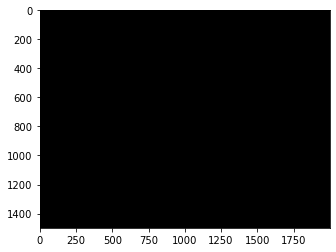

In [12]:
# Note that we have to use img.copy() and not simply copy_img = img!
# Otherwise we overwrite the original img
def paint_img_black(img):
    for row in range(width):
        for column in range(height):
            img[column][row] = [0,0,0]

    plt.imshow(img)
    

copy_img = img.copy()
paint_img_black(copy_img)


(1499, 1999, 3)

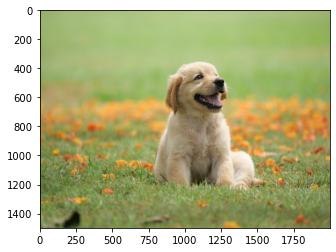

In [27]:
# Ensure we still have the original img
plt.imshow(img)
img.shape

<h4>2.4 Practice Questions </h4>

<p> Using the knowledge that an image is a numpy array, attempt the following exercises: </p>

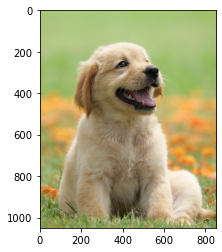

In [31]:
#Q1 Slice out puppy by slicing the numpy array from width 700-1550 pixels and height from 200 pixels to 1250, remeber to use copy!
sliced_img = img[200:1250, 700:1550].copy()# TODO
plt.imshow(sliced_img)

Expected output:

<img src="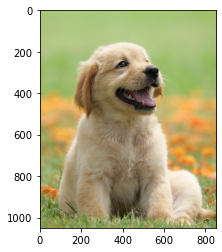
">

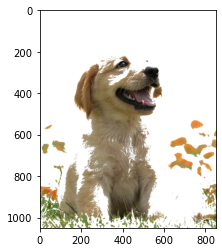

In [32]:
#Q2 Change all pixels with green value > 150 to pre white [255, 255, 255] on the sliced img
#To access for example green you can say img[col][row][1] Order is [Red, Green, Blue]
# Remeber you need to update width and height!

height = sliced_img.shape[0] #TODO
width = sliced_img.shape[1] #TODO
# Use forloops as we have done above, then an if statement to check if the green value is >150

for row in range(width):
    for column in range(height):
        if sliced_img[column][row][1]>150:
            sliced_img[column][row]=255         
            
plt.imshow(sliced_img)

Expected output:
<img src="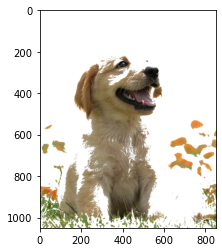
" class="unconfined">

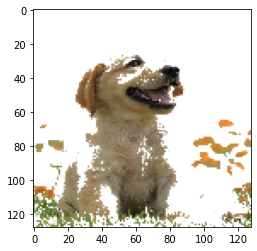

In [33]:
#Q3 Resize the sliced img to a 128x128 img, Hint: Google cv2.resize
resized_img = cv2.resize(sliced_img,(128,128))# TODO
plt.imshow(resized_img)

Expected output:
<img src="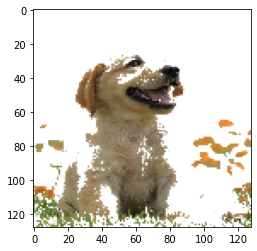
">

In [42]:
#Q4 Using the resized image, flatten it into a numpy array of shape (width*height*3, 1).
# Hint: Use x.reshape(-1, 1). Why -1? Well that puts all the content of the array x in one array
# The 1 then allows us to make it a column vector. Do Google what does -1 mean in reshape. It is important!
flattened_img = resized_img.reshape(-1,1)#TODO

print(flattened_img.shape)
print(flattened_img)

(49152, 1)
[[255]
 [255]
 [255]
 ...
 [207]
 [212]
 [185]]


Expected output: 

<pre>(2677500, 1)
[[255]
 [255]
 [255]
 ...
 [141]
 [149]
 [ 74]]
</pre>

<h3> Closing remarks </h3>

Well done! You are now ready for this weeks assignment:) The actions you performed on the image in Q3 and Q4 is something that is very common in machine learning for processing images and something you will probably see in future courses on the topic of machine learning in association to task like shape recognition, classification etc. 